# **Exploring Traffic Patterns on Illinois Tollways and More**
#### Author: **Ben Amberg**

This article examines traffic trends using data from Illinois and California tollways. It includes visualizations to make these datasets accessible and engaging to a wide audience.

### Importing Necessary Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from bqplot import LinearScale, OrdinalScale, Bars, Axis, Figure, Tooltip
import bqplot
import ipywidgets as widgets

### Loading and Previewing Data

In [65]:
illinois_data = pd.read_csv("illinois_tollway_traffic.csv")
california_data = pd.read_csv("Traffic_Volumes_AADT.csv")

#### Illinois Data:

In [66]:
display(illinois_data.head())

,center_of_segment,direction,from_milepost,route,to_milepost,type,volume,year
0,"{'latitude': '41.7597424300001', 'needs_recodi...",E,44.000,88,44.540,AADT,6450,2010
1,"{'latitude': '41.7804157670001', 'needs_recodi...",E,44.540,88,53.974,AADT,7030,2010
2,"{'latitude': '41.8200514680001', 'needs_recodi...",E,53.974,88,54.409,AADT,5710,2010
3,"{'latitude': '41.8247916670001', 'needs_recodi...",E,54.409,88,56.183,AADT,7200,2010
4,"{'latitude': '41.8232360430001', 'needs_recodi...",E,56.183,88,56.680,AADT,5320,2010


#### California Data:

In [67]:
display(california_data.head())

,X,Y,OBJECTID,DISTRICT,ROUTE,ROUTE_SFX,COUNTY,PM_PFX,PM,PM_SFX,LOCATION_DESCRIPTION,BACK_PEAK_HOUR,BACK_PEAK_MADT,BACK_AADT,AHEAD_PEAK_HOUR,AHEAD_PEAK_MADT,AHEAD_AADT
0,-1.304943e+07,3.881993e+06,1,11,5,NaN,SD,R,30.345,L,BEG INDEP ALIGN LT LNS,8600.0,94000.0,80000.0,3850.0,51000.0,46000.0
1,-1.304939e+07,3.882146e+06,2,11,5,NaN,SD,R,30.426,L,"SAN DIEGO, SORRENTO VALLEY ROAD",4200.0,55000.0,50000.0,3800.0,46500.0,40000.0
2,-1.304941e+07,3.882635e+06,3,11,5,NaN,SD,R,30.682,L,"SAN DIEGO, NORTH JCT RTE 805",6500.0,82000.0,70000.0,4700.0,63000.0,60000.0
3,-1.304979e+07,3.883450e+06,4,11,5,NaN,SD,R,31.155,L,"R31.155 EQUATES R31.188, END INDEP ALIGN",8400.0,104000.0,81000.0,NaN,NaN,NaN
4,-1.313293e+07,4.009214e+06,5,12,5,NaN,ORA,NaN,41.840,L,BEG INDEP ALIGN LT LNS,19200.0,243000.0,223000.0,11600.0,147000.0,133900.0


### Dataset Overview
This project uses two datasets:
1. **Illinois Tollway Data**: Includes Annual Average Daily Traffic (AADT) and peak volumes for various road segments across Illinois.
2. **California Traffic Data**: Provides comparable traffic metrics for roadways in California.

Both datasets offer insights into state-specific traffic patterns, including peak traffic times and long-term averages in traffic volume.

# Average Illinois Tollway Traffic Volume by Route (2010)

In [68]:
avg_traffic_by_route = illinois_data.groupby('route')['volume'].mean().reset_index()
chart = alt.Chart(avg_traffic_by_route).mark_bar().encode(
    x=alt.X('route:N', title='Route Number'),
    y=alt.Y('volume:Q', title='Average Traffic Volume'),
    tooltip=['route', 'volume']
).properties(
    width=600,
    height=400,
    title="Average Traffic Volume by Route (Interactive)"
).interactive()
chart

alt.Chart(...)

This interactive bar chart illustrates the average traffic volumes for Illinois routes. The interactivity allows viewers to hover over the bars to explore exact values and highlights significant variations across routes.

## AADT vs. Peak Traffic Volumes for Illinois Tollways (2010)

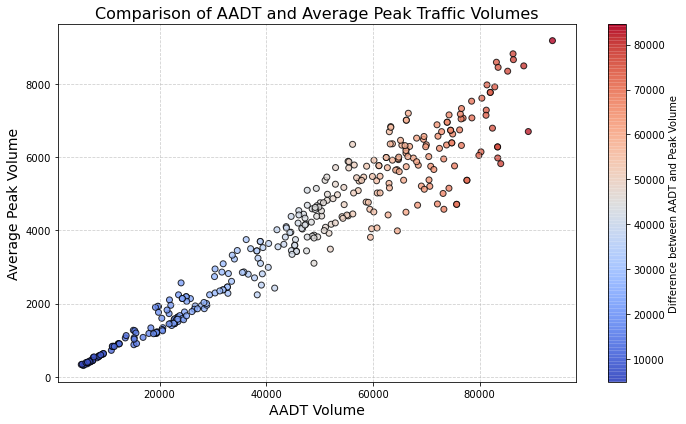

In [69]:
aadt_data = illinois_data[illinois_data['type'] == 'AADT']
peak_data = illinois_data[illinois_data['type'].isin(['AM Peak', 'PM Peak'])]
peak_data_agg = peak_data.groupby('from_milepost')['volume'].mean().reset_index()
peak_data_agg.rename(columns={'volume': 'avg_peak_volume'}, inplace=True)
merged_data = pd.merge(
    aadt_data[['from_milepost', 'volume']],
    peak_data_agg,
    on='from_milepost',
    how='inner'
)
merged_data.rename(columns={'volume': 'volume_AADT'}, inplace=True)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    merged_data['volume_AADT'],
    merged_data['avg_peak_volume'],
    c=np.abs(merged_data['volume_AADT'] - merged_data['avg_peak_volume']),
    cmap='coolwarm',
    alpha=0.8,
    edgecolor='k'
)
plt.title("Comparison of AADT and Average Peak Traffic Volumes", fontsize=16)
plt.xlabel("AADT Volume", fontsize=14)
plt.ylabel("Average Peak Volume", fontsize=14)
plt.colorbar(scatter, label='Difference between AADT and Peak Volume')
plt.grid(alpha=0.6, linestyle='--')
plt.tight_layout()
plt.show()

This scatter plot compares Annual Average Daily Traffic (AADT) volumes with the average of AM and PM peak traffic volumes across Illinois road segments. Each point represents a road segment, and the color gradient indicates the absolute difference between AADT and average peak volumes. This visualization helps identify segments where peak traffic significantly deviates from daily averages, revealing potential areas of congestion or unusual traffic patterns.

## California AADT vs. Peak Hour Traffic

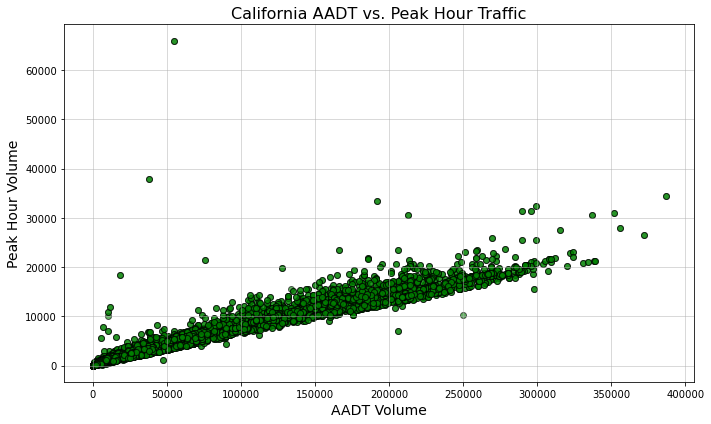

In [70]:
california_aadt_data = california_data[['BACK_AADT', 'BACK_PEAK_HOUR']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(
    california_aadt_data['BACK_AADT'],
    california_aadt_data['BACK_PEAK_HOUR'],
    color='green',
    alpha=0.6,
    edgecolor='k'
)
plt.title("California AADT vs. Peak Hour Traffic", fontsize=16)
plt.xlabel("AADT Volume", fontsize=14)
plt.ylabel("Peak Hour Volume", fontsize=14)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

This static scatter plot shows the relationship between AADT and peak hour traffic volumes in California. By comparing these two metrics, the visualization highlights the degree to which daily traffic volumes align with or differ from peak hour conditions, providing a contextual comparison to the Illinois data.

## Bar Chart of Average AADT Volumes by District in California

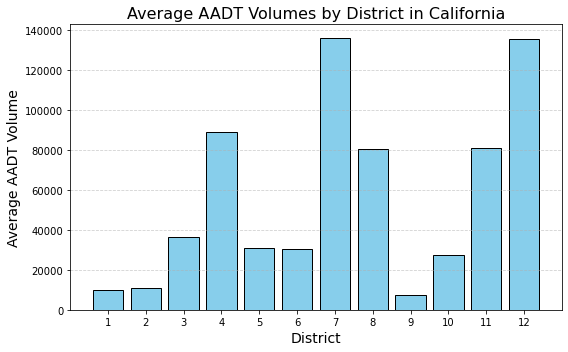

In [71]:
california_aadt_data = california_data[['DISTRICT', 'BACK_AADT']].dropna()
district_avg_aadt = california_aadt_data.groupby('DISTRICT')['BACK_AADT'].mean()
districts = district_avg_aadt.index.astype(str).tolist()
aadt_values = district_avg_aadt.values
plt.figure(figsize=(8, 5))
plt.bar(districts, aadt_values, color='skyblue', edgecolor='black')
plt.title("Average AADT Volumes by District in California", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Average AADT Volume", fontsize=14)
plt.grid(axis='y', alpha=0.6, linestyle='--')
plt.tight_layout()
plt.show()

This bar chart visualizes the average Annual Average Daily Traffic (AADT) volumes across different districts in California. Each bar represents the average traffic volume for a district, making it easy to compare traffic levels regionally. The chart is simple yet effective in identifying traffic trends across California's districts, providing insights that could inform infrastructure planning and traffic management strategies.

## Conclusion

The Illinois dataset provided valuable insights into traffic patterns across the state’s tollways. The interactive bar chart effectively showcased the average traffic volumes by route, making it easy to identify which routes experienced the highest traffic. The scatter plot comparing AADT and average peak traffic volumes further highlighted specific segments where peak traffic significantly deviated from the daily averages. These visualizations underscore the importance of examining both daily and peak traffic patterns for better infrastructure planning and congestion management.

In contrast, the California dataset offered a broader perspective on traffic trends, focusing on regional and peak-hour comparisons. The scatter plot of AADT versus peak-hour volumes revealed strong correlations, indicating predictable traffic behaviors in certain regions. Meanwhile, the bar chart of average AADT volumes by district provided a clear regional comparison, highlighting districts with the heaviest traffic and those with lighter volumes. These visualizations help contextualize state-level traffic patterns and demonstrate the utility of AADT metrics in understanding regional trends.

Together, these datasets and visualizations offer a comprehensive view of traffic behaviors across two states. By analyzing both state-specific and comparative metrics, this project highlights key patterns and differences in traffic management and provides a foundation for future research or policy planning in transportation infrastructure.

### Sources

**Illinois Dataset:**
https://data.illinois.gov/dataset/7a1698fe-ea8a-422b-aee2-22fbbb0ce1a2/resource/50cad7b2-270a-457a-a587-538e1fe70b32/download/data.csv

**California Dataset:**
https://gis.data.ca.gov/datasets/d8833219913c44358f2a9a71bda57f76_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D